In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545,6,7,4.09,23087,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6,7,3.09,40173,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,6,9,5.13,36882,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7,6,3.26,34310,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982,5,8,4.23,26354,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,68593.110000,5.977600,7.002800,3.989816,36032.883600,1.233117e+06
std,10696.973654,1.060919,1.040012,1.241848,9803.904231,3.547254e+05
min,17797.000000,3.000000,3.000000,2.000000,173.000000,3.114052e+04
25%,61461.000000,5.000000,6.000000,3.150000,29381.750000,9.937032e+05
50%,68709.000000,6.000000,7.000000,4.050000,36074.000000,1.235056e+06
75%,75869.000000,7.000000,8.000000,4.500000,42683.250000,1.467923e+06
max,107702.000000,9.000000,11.000000,6.500000,69592.000000,2.469066e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              2500 non-null   int64  
 1   Avg. Area House Age           2500 non-null   int64  
 2   Avg. Area Number of Rooms     2500 non-null   int64  
 3   Avg. Area Number of Bedrooms  2500 non-null   float64
 4   Area Population               2500 non-null   int64  
 5   Price                         2500 non-null   float64
 6   Address                       2500 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 136.8+ KB


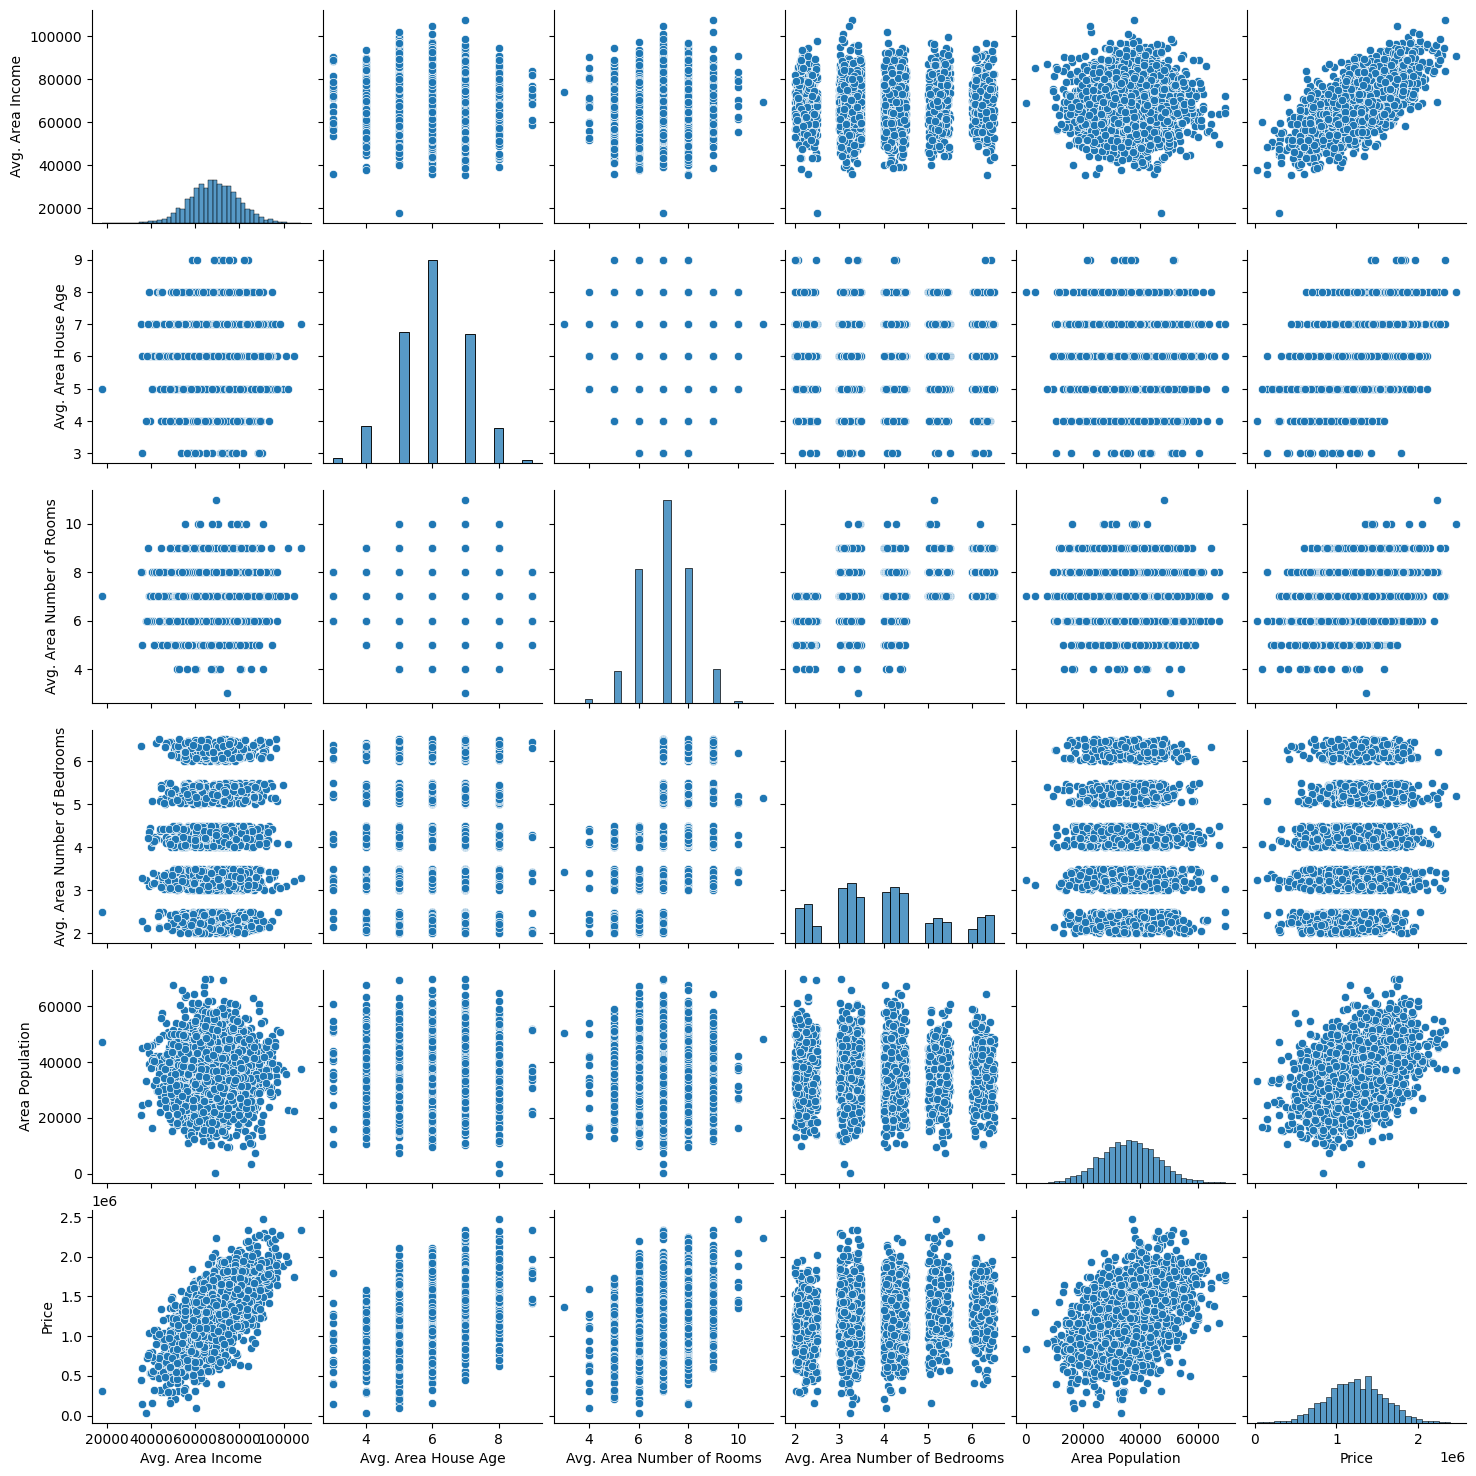

In [12]:
sns.pairplot(df)

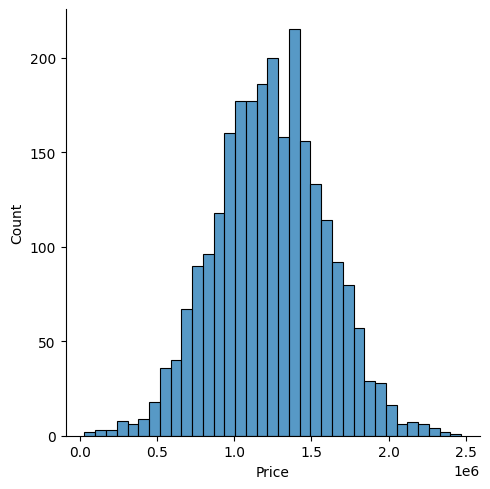

In [13]:
sns.displot(df['Price'])

<Axes: >

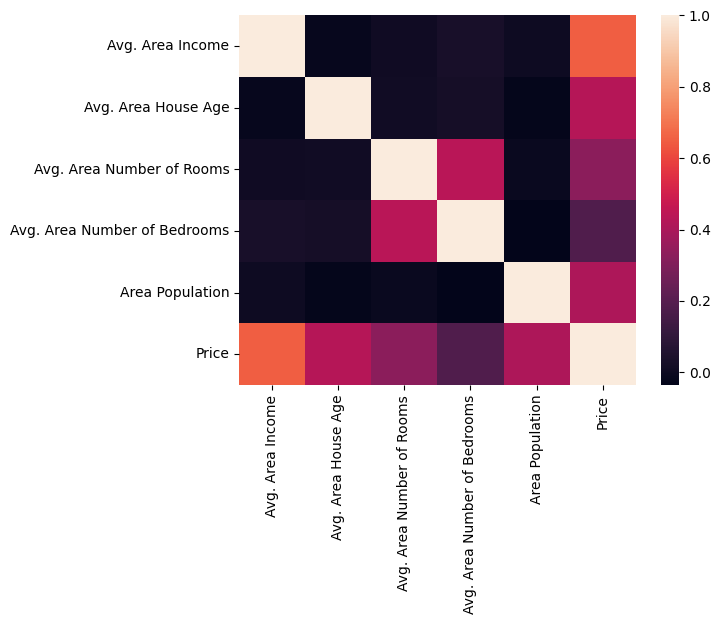

In [15]:
sns.heatmap(df.corr(numeric_only=True))

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
print(lm.intercept_)

-2475717.145236709


In [22]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.613907
Avg. Area House Age,151067.014618
Avg. Area Number of Rooms,105139.535156
Avg. Area Number of Bedrooms,9643.180761
Area Population,15.170500
